<a href="https://colab.research.google.com/github/2002sarika/Data-Science-Intern-at-The-Sparks-Foundation-Grip_OCT2021/blob/master/TASK3_Exploratory_Data_Analysis_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The Sparks Foundation Data Science And Business Analytics INTERNSHIP OCT 2021 BATCH**

## **TASK 3: Exploratory Data Analysis - Retail**

In [2]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.As a business manager, try to find out the weak areas where you can work to make more profit.What all business problems you can derive by exploring the data?
STEPS :

Step 1 : Importing the dataset

Step 2 : Number of unique values in each columns

Step 3 : Check for null values

Step 4 : Data Visualistion

STEP 1 : Importing the data

In this step we will import the required libraries and data with the help of pandas library.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

### **Read all the dataset files**

In [20]:
df=pd.read_csv("/content/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
df.sample(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6406,Second Class,Corporate,United States,Spokane,Washington,99207,West,Furniture,Chairs,569.568,2,0.2,7.1196
1416,Second Class,Home Office,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,37.74,3,0,12.8316
8218,Standard Class,Consumer,United States,Dallas,Texas,75217,Central,Office Supplies,Fasteners,4.344,3,0.2,0.8688
9610,Second Class,Consumer,United States,Los Angeles,California,90045,West,Furniture,Furnishings,282.84,4,0,19.7988
7215,Second Class,Corporate,United States,Detroit,Michigan,48205,Central,Office Supplies,Art,16.4,5,0,4.756


In [11]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9990,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.96,2,0,15.6332
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9993,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6,4,0,13.32
9994,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.16,2,0,72.948


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ship Mode     9995 non-null   object
 1   Segment       9995 non-null   object
 2   Country       9995 non-null   object
 3   City          9995 non-null   object
 4   State         9995 non-null   object
 5   Postal Code   9995 non-null   object
 6   Region        9995 non-null   object
 7   Category      9995 non-null   object
 8   Sub-Category  9995 non-null   object
 9   Sales         9995 non-null   object
 10  Quantity      9995 non-null   object
 11  Discount      9995 non-null   object
 12  Profit        9995 non-null   object
dtypes: object(13)
memory usage: 1015.2+ KB


In [13]:
df.shape

(9995, 13)

In [14]:
df.describe(include="object")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995
unique,5,4,2,532,50,632,5,4,18,5826,15,13,7288
top,Standard Class,Consumer,United States,New York City,California,10035,West,Office Supplies,Binders,12.96,3,0,0
freq,5968,5191,9994,915,2001,263,3203,6026,1523,56,2409,4798,65


STEP 2 : Number of Unique values in each columns

In [15]:
for i in df.columns:
  print(i,len(df[i].unique()))

Ship Mode 5
Segment 4
Country 2
City 532
State 50
Postal Code 632
Region 5
Category 4
Sub-Category 18
Sales 5826
Quantity 15
Discount 13
Profit 7288


In [16]:
#null values
df.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

STEP 3 : Data Visualization

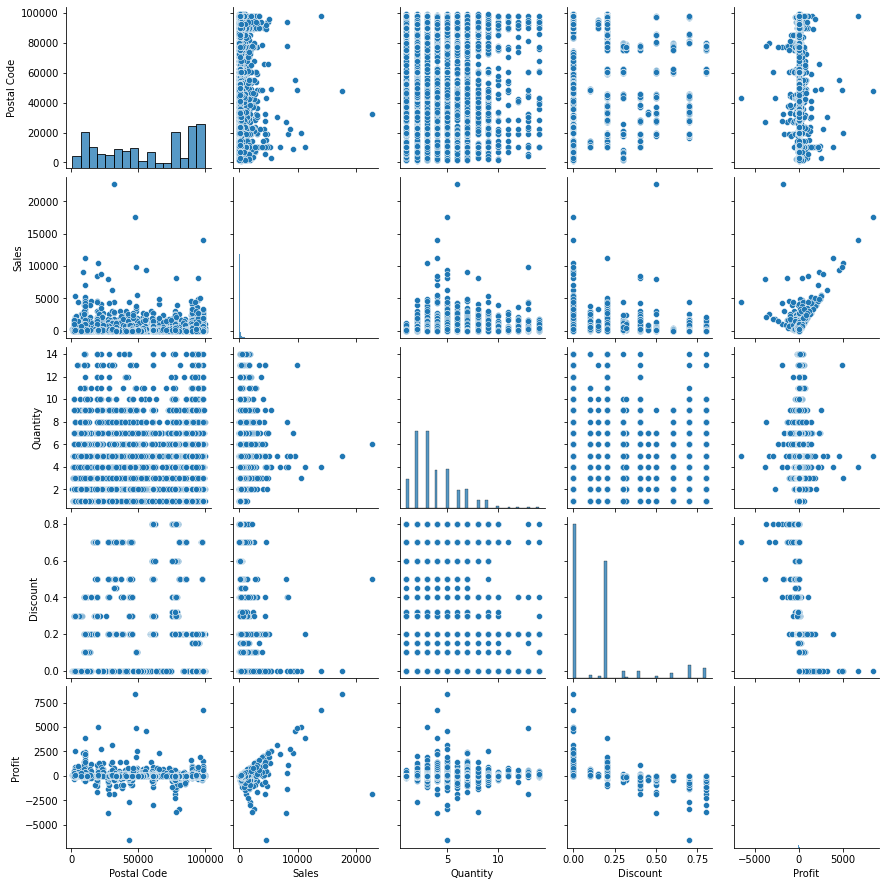

In [22]:
sns.pairplot(df,palette="coolwarm")

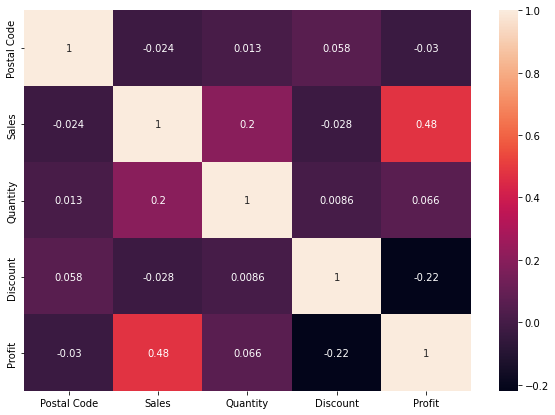

In [25]:
fig,ax=plt.subplots(1,1,figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cbar=True)

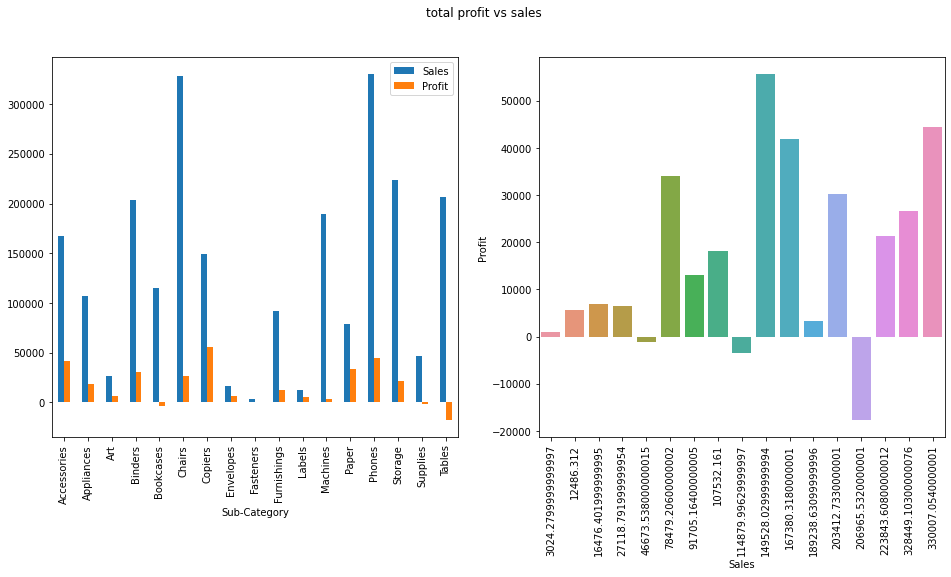

In [32]:
fig,axes=plt.subplots(1,2,figsize=(16,7))
fig.suptitle("total profit vs sales")
sns.barplot(data=df.groupby("Sub-Category")["Sales","Profit"].agg(sum),x="Sales",y="Profit",ax=axes[1])
df.groupby('Sub-Category')['Sales','Profit'].agg(sum).plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()

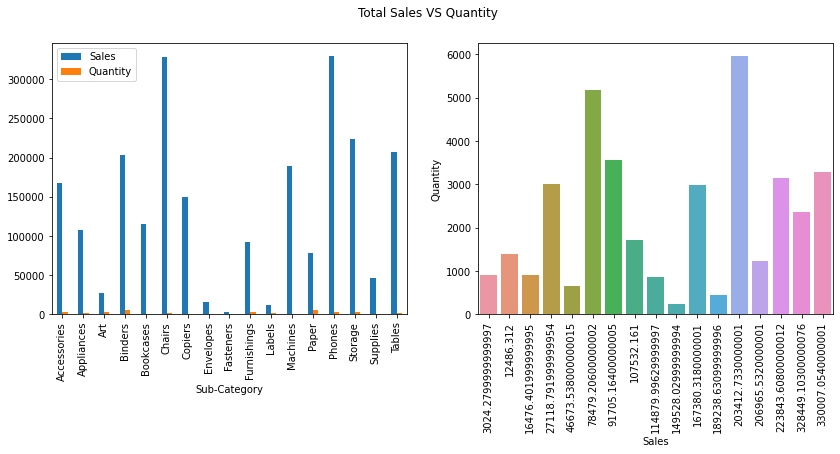

In [33]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
fig.suptitle("Total Sales VS Quantity ")
sns.barplot(data=df.groupby('Sub-Category')['Sales','Quantity'].agg(sum),x='Sales',y='Quantity',ax=axes[1])
df.groupby('Sub-Category')['Sales','Quantity'].agg(sum).plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()

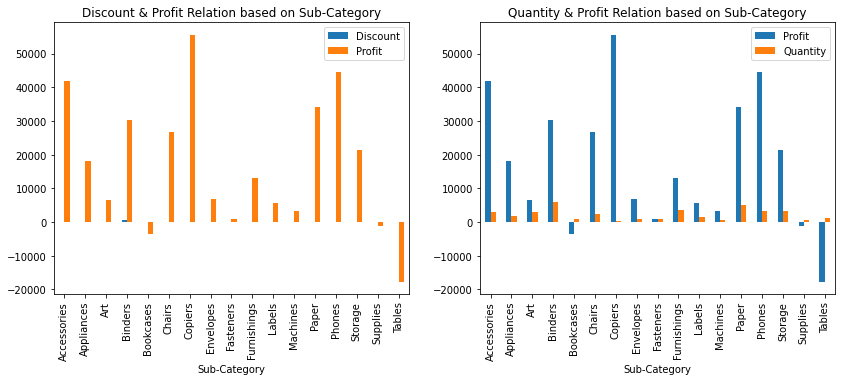

In [34]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
df.groupby('Sub-Category')['Discount','Profit'].agg(sum).plot(kind='bar',ax=axes[0]).set_title('Discount & Profit Relation based on Sub-Category')
df.groupby('Sub-Category')['Profit','Quantity'].agg(sum).plot(kind='bar',ax=axes[1]).set_title('Quantity & Profit Relation based on Sub-Category')
plt.xticks(rotation=90)
plt.show()

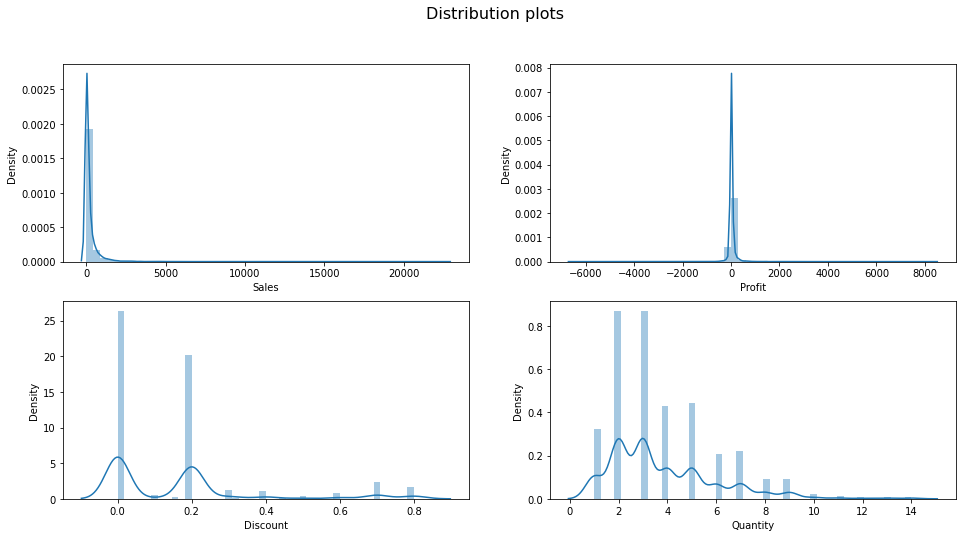

In [35]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Distribution plots", fontsize=16)
sns.distplot(df['Sales'],ax=axes[0,0])
sns.distplot(df['Profit'],ax=axes[0,1])
sns.distplot(df['Discount'],ax=axes[1,0])
sns.distplot(df['Quantity'],ax=axes[1,1])
plt.show()

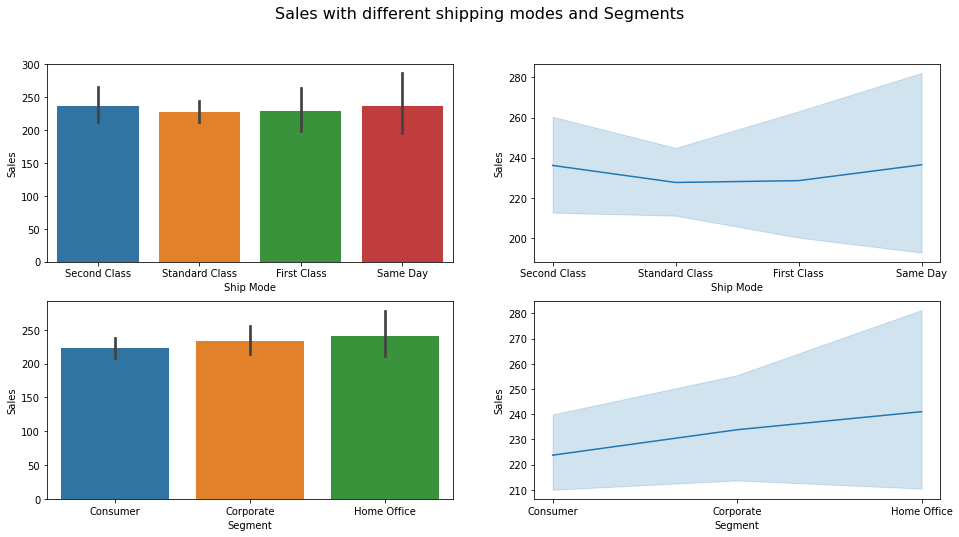

In [37]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Sales with different shipping modes and Segments", fontsize=16)
sns.barplot(df['Ship Mode'],df['Sales'],ax=axes[0,0])
sns.lineplot(df['Ship Mode'],df['Sales'],ax=axes[0,1])
sns.barplot(df['Segment'],df['Sales'],ax=axes[1,0])
sns.lineplot(df['Segment'],df['Sales'],ax=axes[1,1])
plt.show()

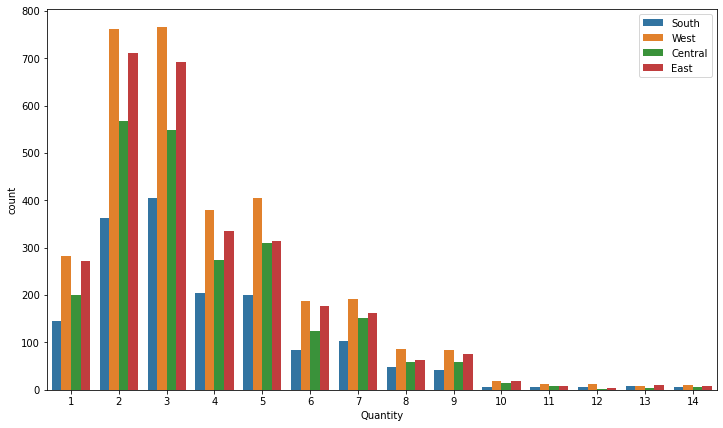

In [40]:
fig,ax= plt.subplots(1,1,figsize=(12,7))
sns.countplot(df['Quantity'],hue=df['Region'])
plt.legend(loc="best")
plt.show()